In [143]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tueplots import axes
import numpy as np

data = pd.read_csv('../Prepared_Data/data.csv')

In [144]:
##### Set the Plot Sheme #####
import tueplots
from tueplots import bundles
from tueplots import figsizes, fontsizes

# this provides the color palette of Uni Tuebingen
from tueplots.constants.color import rgb
# e.g. as rgb.tue_blue, rgb.tue_red, etc.

# set plotting stylesheet
#plt.rcParams.update(bundles.icml2022(column='full', nrows=1, ncols=2, usetex=False))

plt.style.use('default') 



In [145]:
##### Cluster data #####

# remove rows that have values missing
data = data.dropna()

# calculate correlation between 'year' and each complexity factor
correlation_with_year = data[['year', 'number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                                   'number_of_categories', 'number_of_unique_parts', 'number_of_different_parts',
                                   'not_unique_parts', 'proportion_unique_to_not_unique']].corr()['year']


print(correlation_with_year)

# select relevant columns for clustering
columns_for_clustering = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                           'number_of_categories', 'number_of_unique_parts',
                           'number_of_different_parts', 'not_unique_parts']

# extract the selected columns for clustering
data_for_clustering = data[columns_for_clustering]

# impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
data_for_clustering_imputed = imputer.fit_transform(data_for_clustering)

# standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering_imputed)

# determine the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

year                               1.000000
number_of_parts                    0.167349
minifig_quantitiy                  0.142818
number_of_colors                   0.390034
number_of_categories               0.306093
number_of_unique_parts             0.265063
number_of_different_parts          0.229051
not_unique_parts                   0.156939
proportion_unique_to_not_unique    0.043316
Name: year, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

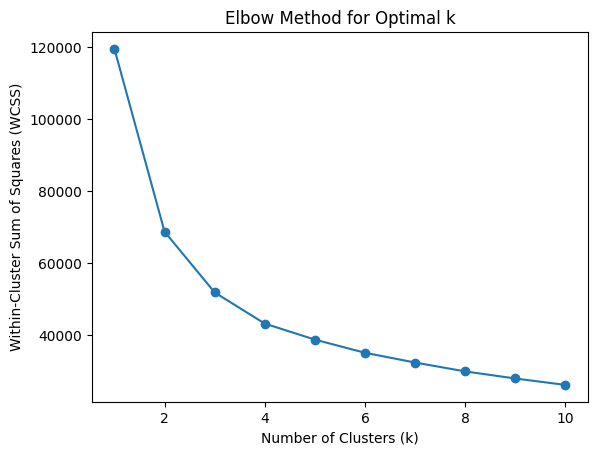

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


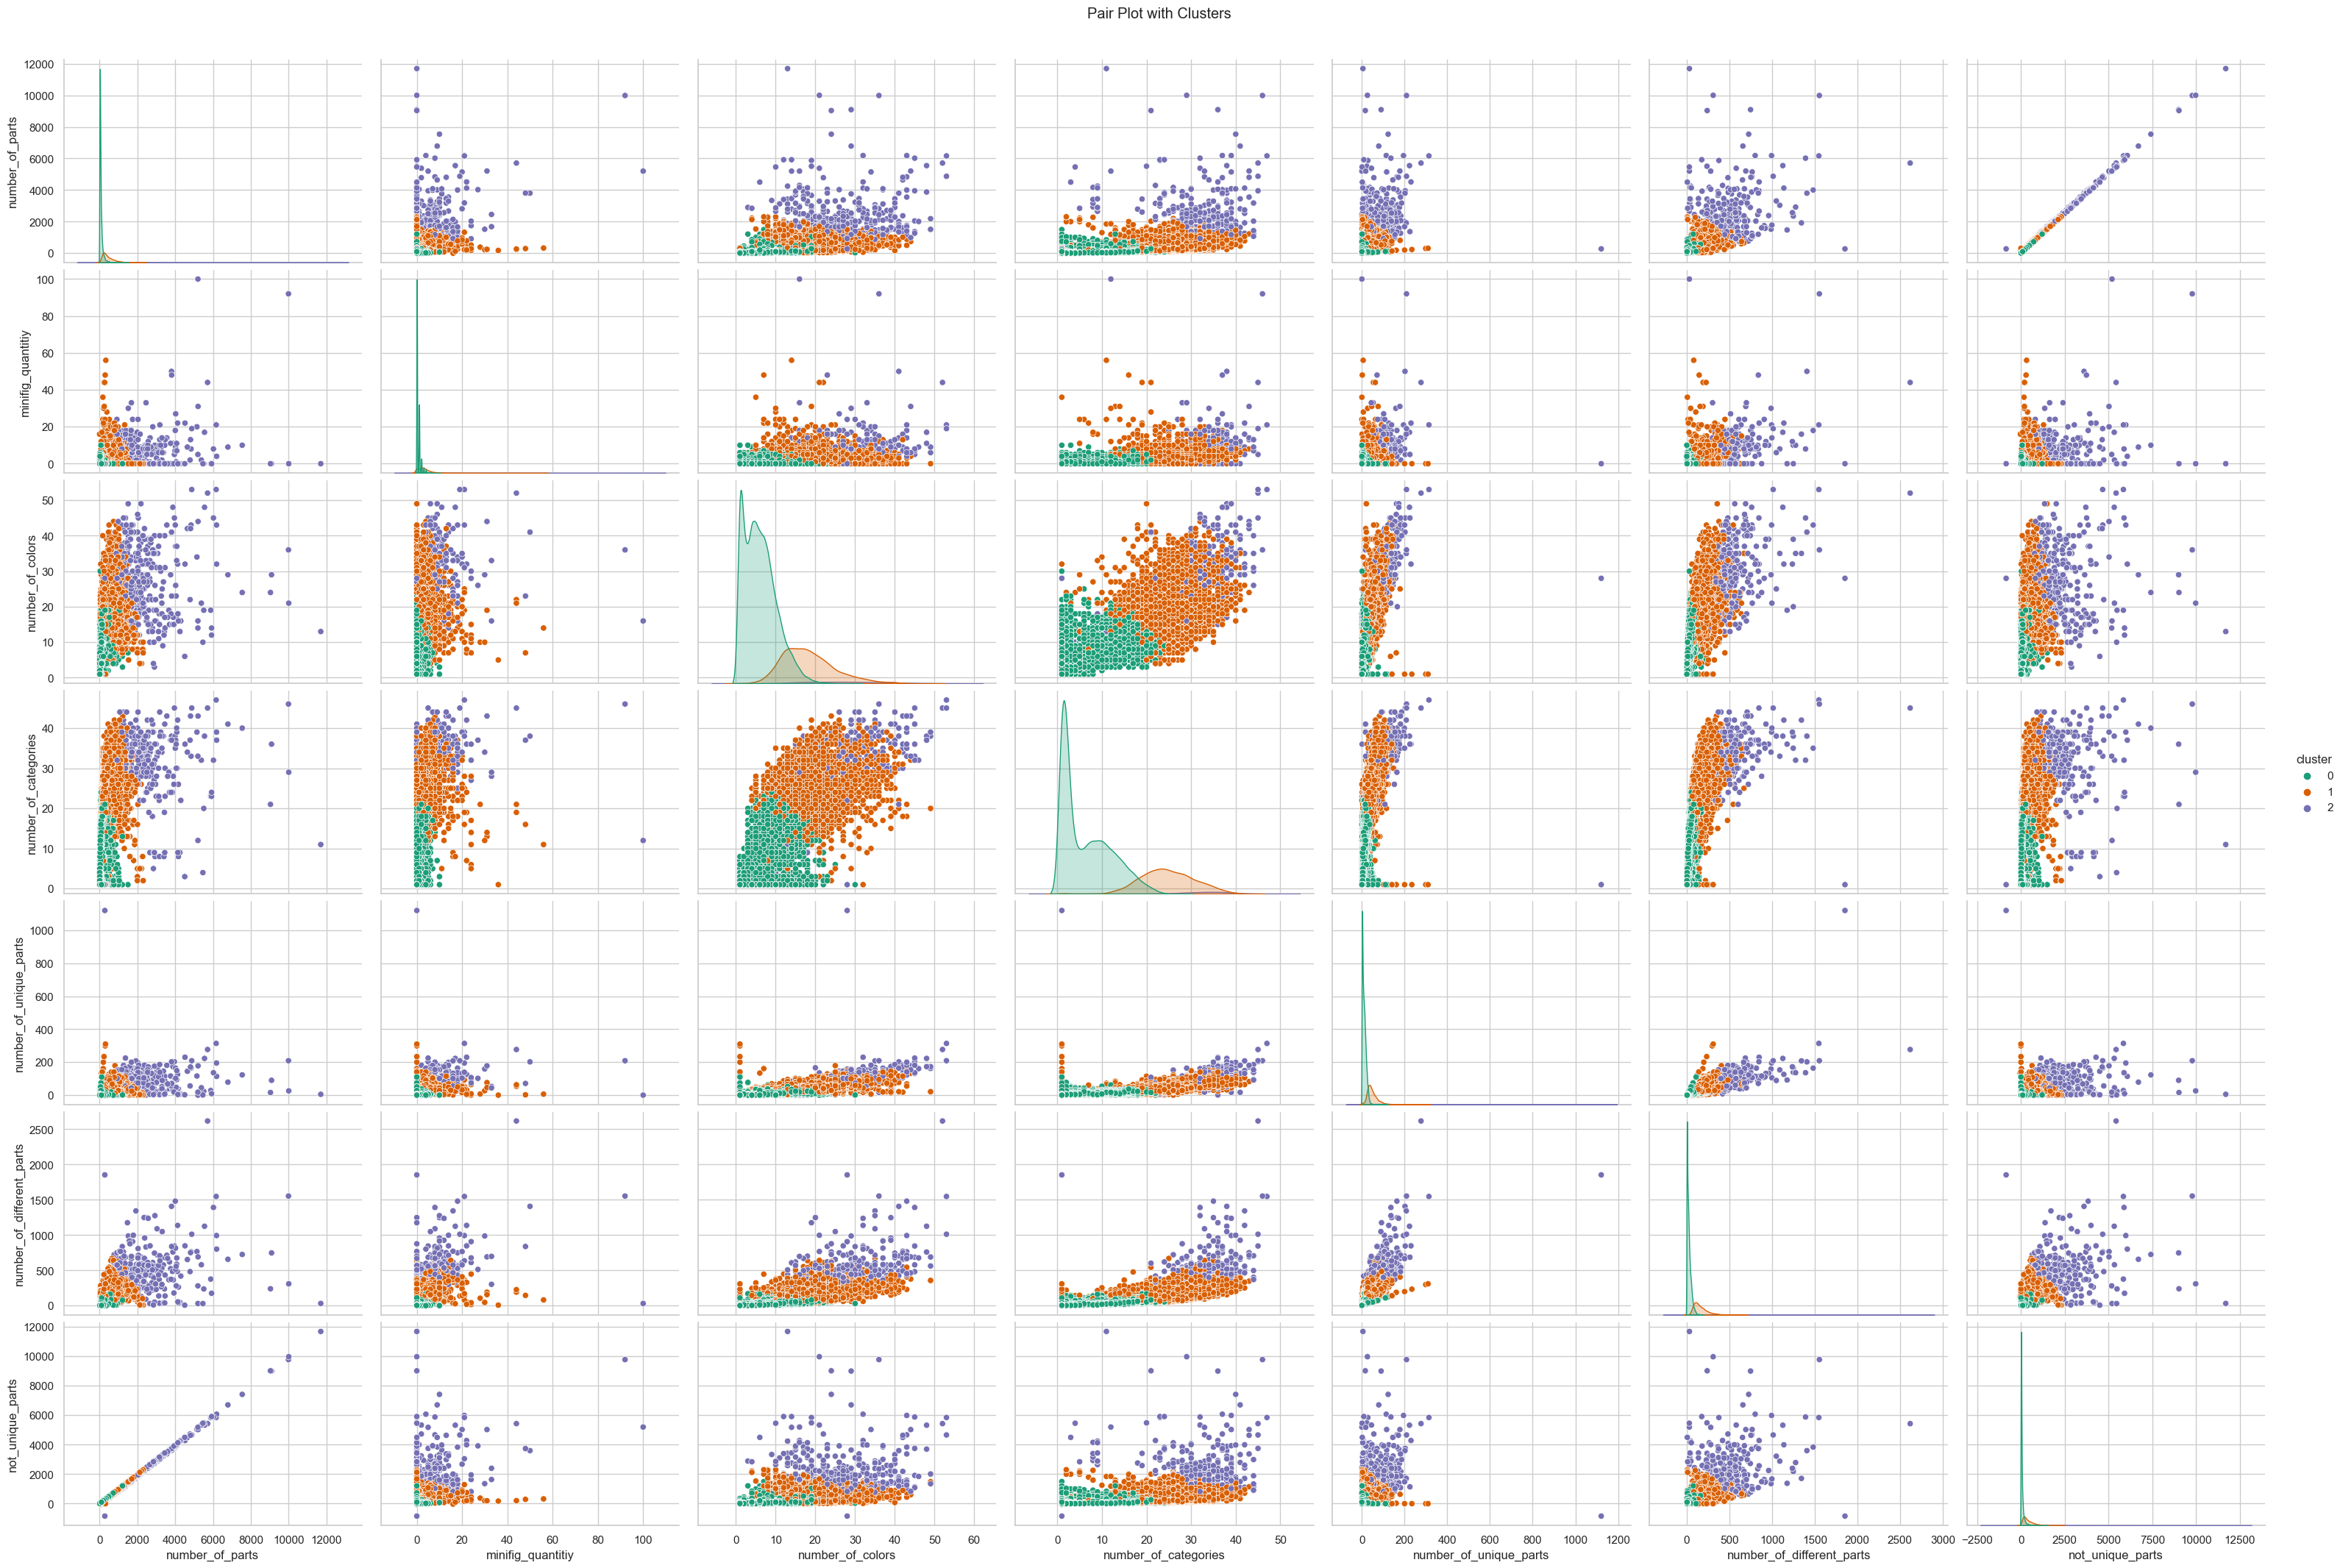

In [146]:
##### Plot the elbow method graph #####

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# based on the elbow method, choose the optimal number of clusters
optimal_k = 3  # You can change this based on the plot

# perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# add the cluster labels to the original DataFrame
data['cluster'] = clusters

# sort for increasing complexity
data['cluster'] = data['cluster'].replace({0: 2, 1: 0, 2: 1})

# visualize the clusters using a pair plot
sns.set(style="whitegrid")
sns.pairplot(data, hue='cluster', palette='Dark2', vars=columns_for_clustering, height=3, aspect=1.5)
plt.suptitle('Pair Plot with Clusters', y=1.02)
plt.show()

In [147]:
##### Print means of different factors in the clusters #####

# select only numeric columns for aggregation
numeric_columns = ['number_of_parts', 'minifig_quantitiy', 'number_of_colors',
                    'number_of_categories', 'number_of_unique_parts',
                    'number_of_different_parts', 'not_unique_parts',
                    'proportion_unique_to_not_unique', 'complexity_score']

# ensure numeric columns have the correct data types (convert if necessary)
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# drop rows with missing values
df = data.dropna(subset=numeric_columns)

# group by cluster and calculate mean for numeric columns
cluster_means = data.groupby('cluster')[numeric_columns].mean()

# display the cluster means
print(cluster_means)

         number_of_parts  minifig_quantitiy  number_of_colors   
cluster                                                         
0              63.604452           0.476670          6.066466  \
1             463.777401           3.268570         18.192112   
2            2580.024922           7.582555         27.442368   

         number_of_categories  number_of_unique_parts   
cluster                                                 
0                    6.464390                9.536877  \
1                   24.624486               47.323010   
2                   32.049844               96.691589   

         number_of_different_parts  not_unique_parts   
cluster                                                
0                        23.393647         54.067575  \
1                       159.981128        416.454391   
2                       512.763240       2483.333333   

         proportion_unique_to_not_unique  complexity_score  
cluster                                       

   number_of_parts  minifig_quantitiy  number_of_colors  number_of_categories   
0         0.020469           0.042080          0.117338              0.102384  \
1         0.149249           0.288544          0.351872              0.390006   
2         0.830282           0.669376          0.530790              0.507610   

   number_of_unique_parts  number_of_different_parts  not_unique_parts   
0                0.062109                   0.033605          0.018304  \
1                0.308190                   0.229812          0.140987   
2                0.629701                   0.736583          0.840709   

   complexity_score  
0          0.025697  
1          0.175054  
2          0.799249  


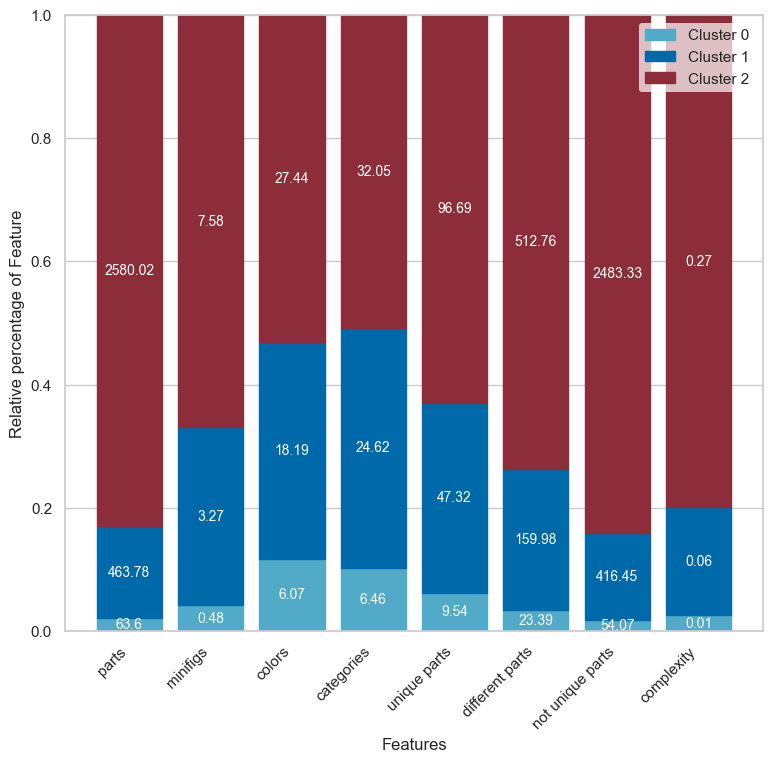

In [148]:
##### Plot the proportion of features in the different clusters #####

# drop proprtion of unique to not unique parts
cluster_data = cluster_means.drop(columns=['proportion_unique_to_not_unique'])

# create feature data
feature_data = {
    'number_of_parts': cluster_means['number_of_parts'].values,
    'minifig_quantitiy': cluster_means['minifig_quantitiy'].values,
    'number_of_colors': cluster_means['number_of_colors'].values,
    'number_of_categories': cluster_means['number_of_categories'].values,
    'number_of_unique_parts': cluster_means['number_of_unique_parts'].values,
    'number_of_different_parts': cluster_means['number_of_different_parts'].values,
    'not_unique_parts': cluster_means['not_unique_parts'].values,
    'complexity_score': cluster_means['complexity_score'].values
}

feature_data = pd.DataFrame(feature_data)

# normalize the data so that each array for each feature adds up to 1
normalized_data = feature_data.div(feature_data.sum(axis=0), axis=1)
print(normalized_data)

fig, ax = plt.subplots(figsize=(9,8))

# calculate clusters
cluster_0 = normalized_data.values[0]
cluster_1 = normalized_data.values[1]
cluster_2 = normalized_data.values[2]
cluster_0_plus_cluster_1 = cluster_0 + cluster_1

# Round and convert to strings
cluster_0_labels = [str(round(value, 2)) for value in cluster_data.values[0]]
cluster_1_labels = [str(round(value, 2)) for value in cluster_data.values[1]]
cluster_2_labels = [str(round(value, 2)) for value in cluster_data.values[2]]

features = ['parts', 'minifigs', 'colors', 'categories', 'unique parts', 'different parts', 
            'not unique parts', 'complexity']

b = ax.bar(features, cluster_0, color=rgb.tue_lightblue, label="Cluster 0", edgecolor=rgb.tue_lightblue)
ax.bar_label(b, padding=0, labels=np.array(cluster_0_labels), color = 'w', fontsize = 'small', label_type="center")

b = ax.bar(features, cluster_1, bottom=cluster_0, color=rgb.tue_blue, label= "Cluster 1", edgecolor=rgb.tue_blue)
ax.bar_label(b, padding=0, labels=cluster_1_labels, color = 'w', fontsize = 'small', label_type="center")

b = ax.bar(features, cluster_2, bottom=cluster_0_plus_cluster_1, color=rgb.tue_red, label= "Cluster 2", edgecolor=rgb.tue_red)
ax.bar_label(b, padding=0, labels=cluster_2_labels, color = 'w', fontsize = 'small', label_type="center")

ax.set_xticks(features)
ax.set_xlabel("Features")
ax.legend(loc = 'upper right', framealpha = 0.7, facecolor = 'white', edgecolor = 'none')
ax.set_ylabel("Relative percentage of Feature")
ax.set_ylim(0,1)
plt.xticks(rotation=45, ha='right')

plt.savefig('../Images/Clusters_features.pdf')

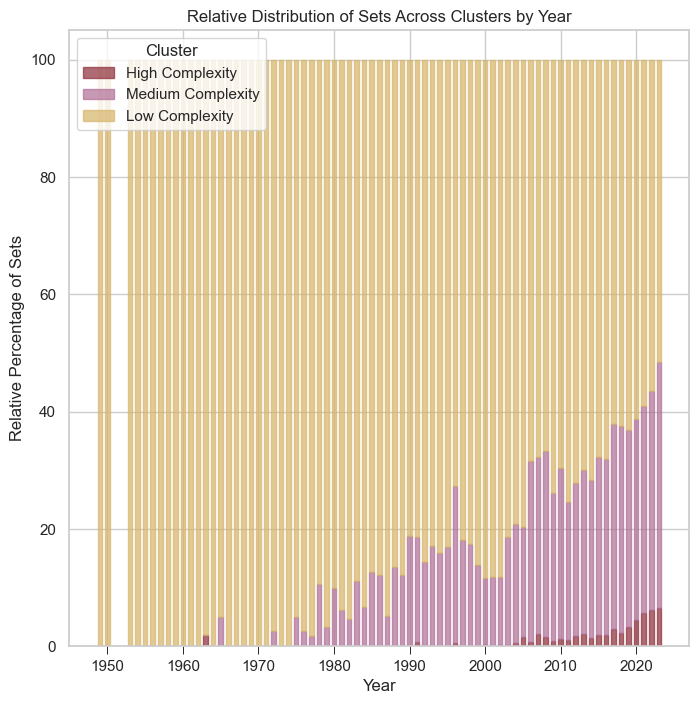

In [149]:
##### Plot the relative percentage of sets in each cluster for every year #####

# group by year and cluster, and calculate the relative percentage
cluster_year_counts = df.groupby(['year', 'cluster']).size().reset_index(name='set_count')
cluster_year_counts['relative_percentage'] = (
    cluster_year_counts.groupby('year')['set_count'].transform(lambda x: x / x.sum()) * 100
)

# pivot the DataFrame to have clusters as columns
pivot_df = cluster_year_counts.pivot(index='year', columns='cluster', values='relative_percentage').fillna(0)

# create the figure and axes
fig, ax = plt.subplots(figsize=(8,8))

# plot the stacked bar plot using ax.bar
years = pivot_df.index
clusters_plot = pivot_df.columns
bottom_values = pd.Series(0, index=years)
colors = [rgb.tue_red, rgb.tue_violet, rgb.tue_lightorange]

cluster_labels = {
    0: 'Low Complexity',
    1: 'Medium Complexity',
    2: 'High Complexity'}

# reverse the order of clusters
for cluster, color in zip(reversed(clusters_plot), colors):
    ax.bar(
        years,
        pivot_df[cluster],
        bottom=bottom_values,
        label=cluster_labels[cluster],
        alpha=0.7,
        color=color,
        edgecolor=color,
        width=0.603
    )
    bottom_values += pivot_df[cluster]

ax.set_title('Relative Distribution of Sets Across Clusters by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Relative Percentage of Sets')
plt.tick_params(axis='x', which='major', bottom=True, width=0.7)    
#ax.set_xlim(1948, 2024)
ax.legend(title='Cluster')
plt.savefig('../Images/Clusters.pdf')
plt.show()


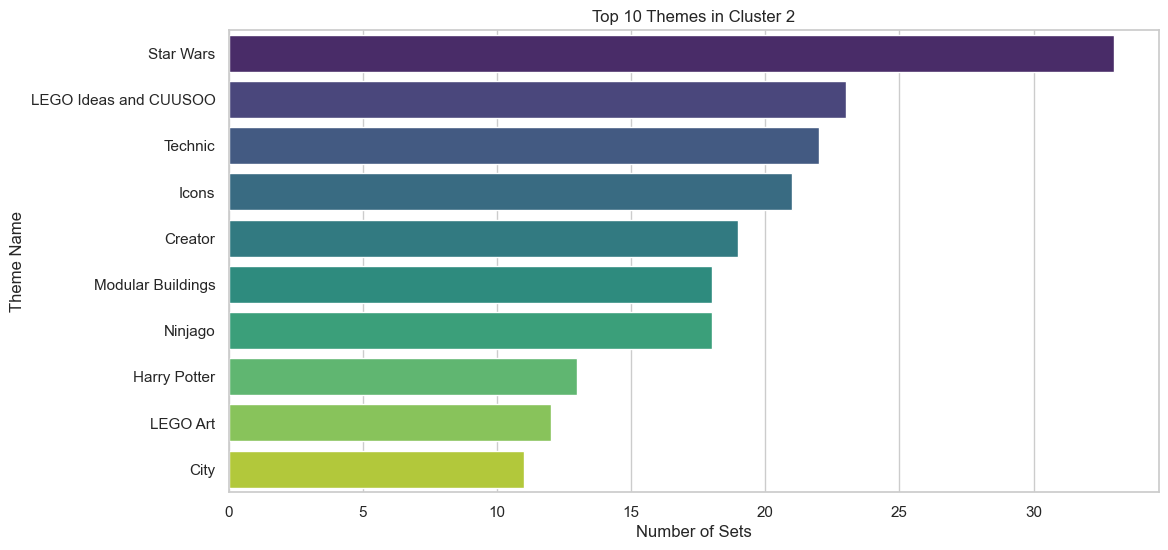

In [150]:
##### Plot 10 most complex themes ##### 

# assuming that cluster 2 accounts for the most complex sets, find out which themes are the most complex
cluster_2_df = df[df['cluster'] == 2]

# get the 10 most common themes in Cluster 2
top_10_themes_cluster_2 = cluster_2_df['theme_name'].value_counts().head(10)

# plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_themes_cluster_2.values, y=top_10_themes_cluster_2.index, palette='viridis')
plt.title('Top 10 Themes in Cluster 2')
plt.xlabel('Number of Sets')
plt.ylabel('Theme Name')
plt.show()

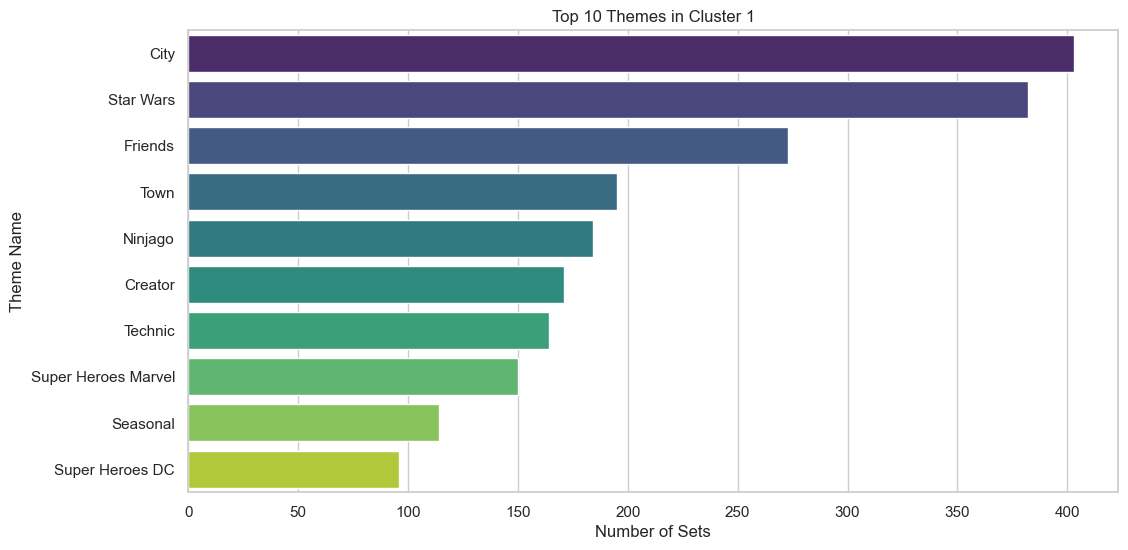

In [151]:
##### 10 middle complex themes #####

cluster_1_df = df[df['cluster'] == 1]

# get the 10 most common themes in Cluster 1
top_10_themes_cluster_1 = cluster_1_df['theme_name'].value_counts().head(10)

# plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_themes_cluster_1.values, y=top_10_themes_cluster_1.index, palette='viridis')
plt.title('Top 10 Themes in Cluster 1')
plt.xlabel('Number of Sets')
plt.ylabel('Theme Name')
plt.show()


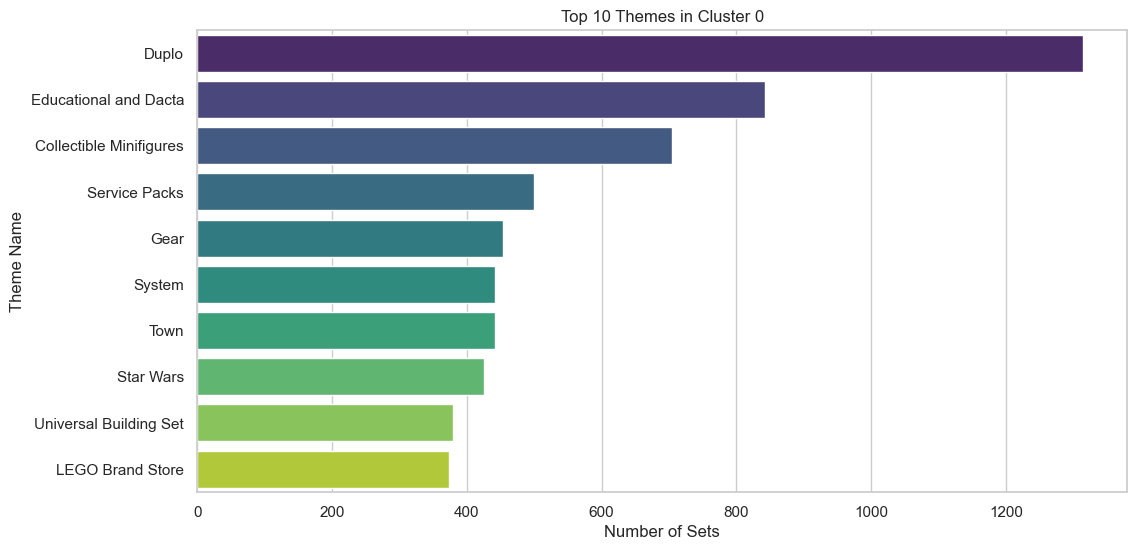

In [152]:
##### 10 low complex themes #####

cluster_0_df = df[df['cluster'] == 0]

# get the 10 most common themes in Cluster 1
top_10_themes_cluster_0 = cluster_0_df['theme_name'].value_counts().head(10)

# plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_themes_cluster_0.values, y=top_10_themes_cluster_0.index, palette='viridis')
plt.title('Top 10 Themes in Cluster 0')
plt.xlabel('Number of Sets')
plt.ylabel('Theme Name')
plt.show()

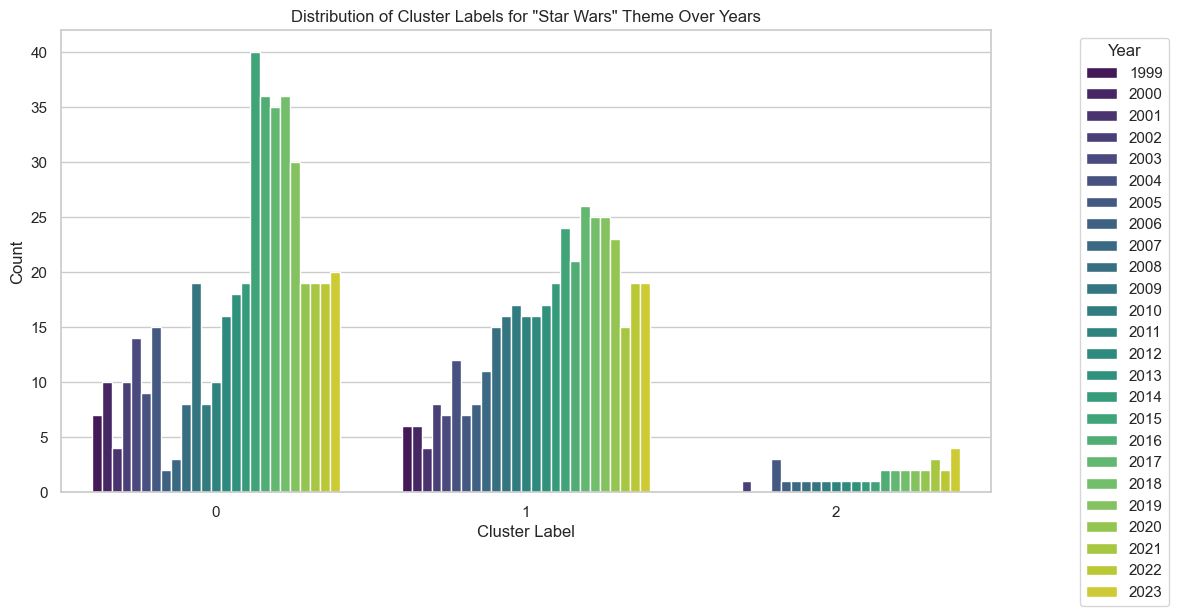

In [153]:
##### Plot the change of Star Wars complexity #####

# see how the clusters for the theme star wars has changed over time (Dass star wars top 1 ist in cluster 2, liegt vlt daran, dass es einfach so viele 
# star wars sets gibt

# filter the DataFrame for sets with theme name "Star Wars"
star_wars_df = df[df['theme_name'] == 'Star Wars']

# plot the count of cluster labels for "Star Wars" theme over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='year', data=star_wars_df, palette='viridis')
plt.title('Distribution of Cluster Labels for "Star Wars" Theme Over Years')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

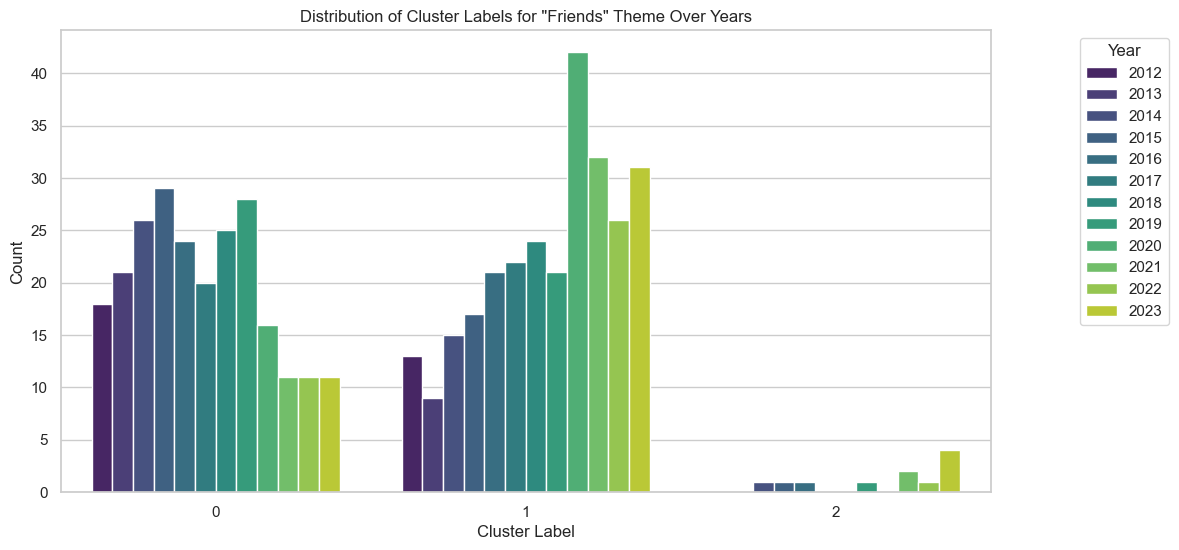

In [154]:
##### Plot the change of Friends complexity #####

# filter the DataFrame for sets with theme name "Star Wars"
friends_df = df[df['theme_name'] == 'Friends']

# plot the count of cluster labels for "Friends" theme over the years
plt.figure(figsize=(12, 6))
sns.countplot(x='cluster', hue='year', data=friends_df, palette='viridis')
plt.title('Distribution of Cluster Labels for "Friends" Theme Over Years')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.legend(title='Year', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()